__Import the required libraries__

In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import scipy
from sklearn.model_selection import train_test_split

__Read the file and print the first few rows__

In [2]:
df = pd.read_csv('EPL_Soccer_MLR_LR.csv')
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


__Print the dataframe information__

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


__Print the descriptive statistics__

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistanceCovered(InKms),202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
Goals,202.0,7.108663,1.800549,3.30,5.9000,6.850,8.275,14.30
MinutestoGoalRatio,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
ShotsPerGame,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
AgentCharges,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
BMI,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
Cost,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
PreviousClubCost,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00
Height,202.0,180.103960,9.734494,148.90,174.0000,179.700,186.175,209.40
Weight,202.0,75.008168,13.925574,37.80,66.5250,74.400,84.125,123.20


__Check for correlation__

In [5]:
df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


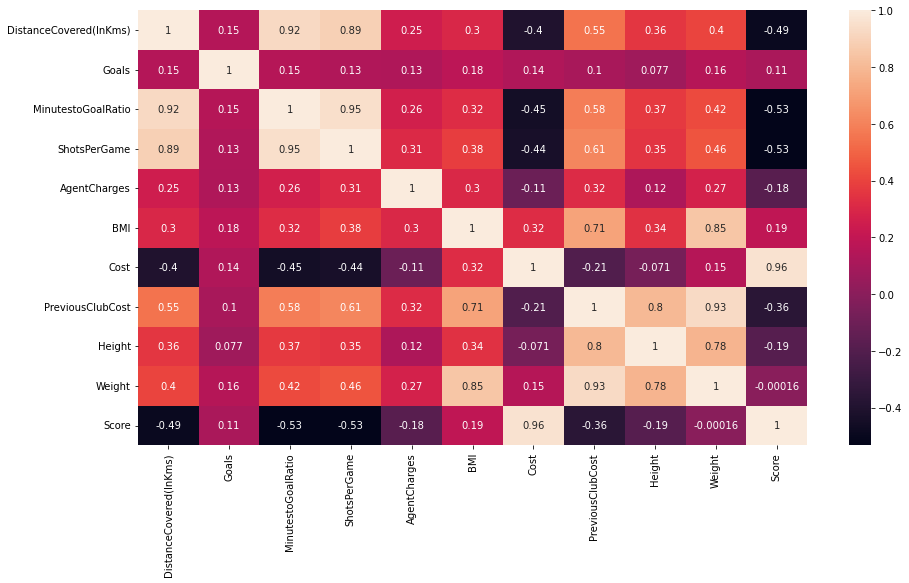

In [6]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# From the above figure we can see that cost and score are highly correlated

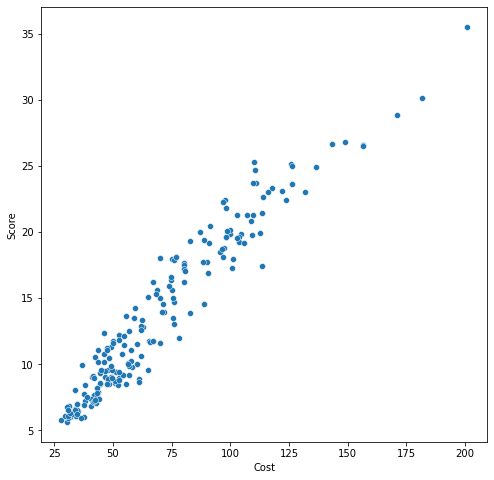

In [8]:
plt.figure(figsize=(8,8))
sns.scatterplot(df['Cost'],df['Score'])
plt.show()

In [9]:
X = df['Cost']
y = df['Score']

__Split the data to train and test set__

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.25)

In [ ]:
# Stats model

In [13]:
lr = sm.OLS(y_train,X_train).fit()

In [14]:
lr.params

Cost    0.192712
dtype: float64

In [15]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.136e+04
Date:                Fri, 30 Dec 2022   Prob (F-statistic):                   2.80e-143
Time:                        12:51:20   Log-Likelihood:                         -294.44
No. Observations:                 151   AIC:                                      590.9
Df Residuals:                     150   BIC:                                      593.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1927      0.002    106.576      0.000       0.189       0.196
==============================================================================
Omnibus:                        1.721   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.391
Skew:                          -0.014   Prob(JB):                        0.499
Kurtosis:                       3.469   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# force intercept term

In [18]:
X_train_with_intercept = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1936.
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           2.89e-87
Time:                        12:56:43   Log-Likelihood:                -291.39
No. Observations:                 151   AIC:                             586.8
Df Residuals:                     149   BIC:                             592.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7921      0.320      2.475      0.014       0.160       1.424
Cost           0.1834      0.004     43.999      0.000       0.175       0.192
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.165
Skew:                           0.352   Prob(JB):                        0.205
Kurtosis:                       3.083   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Scatter plot for our model on train data__

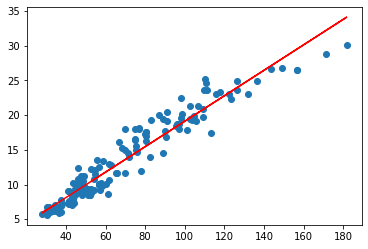

In [19]:
ß0 = lr.params[0]
ß1 = lr.params[1]
plt.scatter(X_train,y_train)
plt.plot(X_train,ß0 + ß1 * X_train,'r')
plt.show()

In [21]:
# plot the fitted line on test data
x_test_with_intercept = sm.add_constant(X_test)
y_test_fitted = lr.predict(x_test_with_intercept)

__Scatter plot for our model on test data__

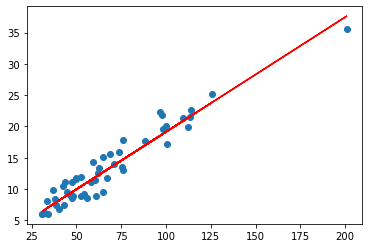

In [23]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_fitted,'r')
plt.show()

__Diagnostics and Remedial measures__

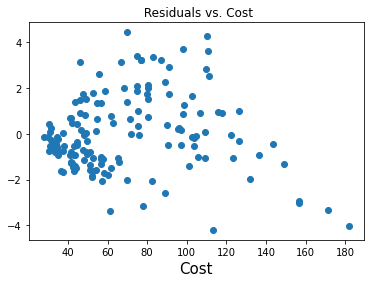

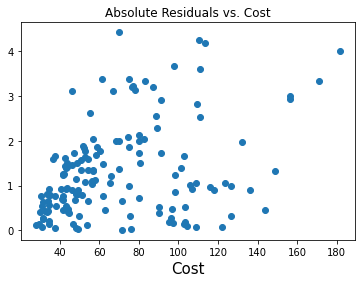

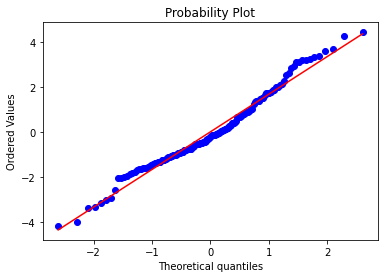

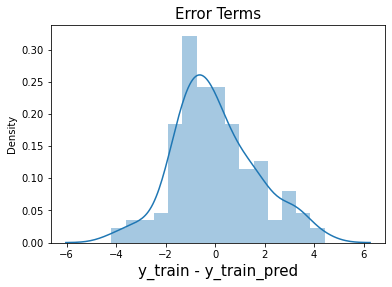

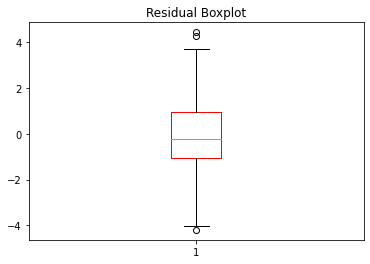

In [29]:
#DIAGNOSTICS

#CHECKLIST:
# NON-LINEARITY
# NON-CONSTANT VARIANCE
# DEVIATIONS FROM NORMALITY
# ERRORS NOT IID
# OUTLIERS
# MISSING PREDICTORS



#Build predictions on training data
predictions_y = lr.predict(X_train_with_intercept)

#Find residuals
r_i = (y_train - predictions_y)


#Residuals vs. predictor in training data
plt.title(' Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(X_train, r_i)
plt.show()




#Absolute residuals against predictor
abs_r_i = np.abs(y_train - predictions_y)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(X_train, abs_r_i)
plt.show()

#Normality plot
scipy.stats.probplot(r_i,plot=plt)

#Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

#Boxplot for outliers
# plot
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');

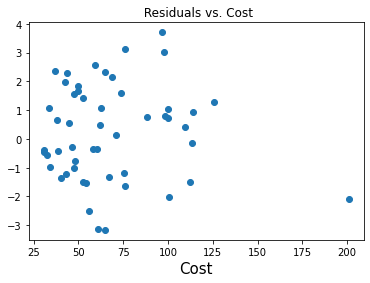

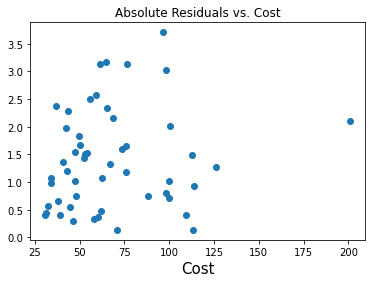

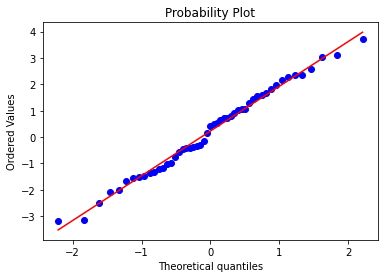

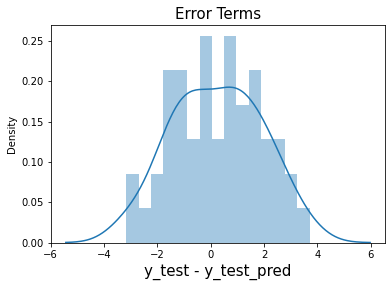

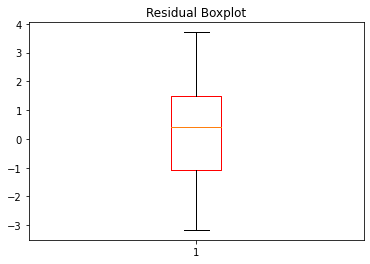

In [30]:
#DIAGNOSTICS

#CHECKLIST:
# NON-LINEARITY
# NON-CONSTANT VARIANCE
# DEVIATIONS FROM NORMALITY
# ERRORS NOT IID
# OUTLIERS
# MISSING PREDICTORS



#Build predictions on training data
predictions_y = lr.predict(x_test_with_intercept)

#Find residuals
r_i = (y_test - predictions_y)


#Residuals vs. predictor in training data
plt.title(' Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(X_test, r_i)
plt.show()




#Absolute residuals against predictor
abs_r_i = np.abs(y_test - predictions_y)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(X_test, abs_r_i)
plt.show()

#Normality plot
scipy.stats.probplot(r_i,plot=plt)

#Tails might be a little heavy, but overall no clear reason to reject normality expectations
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_test - y_test_pred', fontsize = 15)
plt.show()

#Boxplot for outliers
# plot
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');

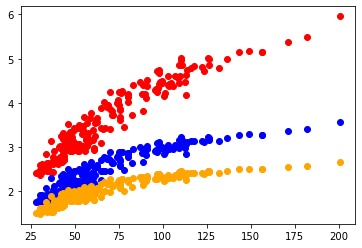

In [33]:
#Try sqrt
sqrt_y=np.sqrt(y)
plt.scatter(X, sqrt_y,color='red');

#Try ln
ln_y=np.log(y)
plt.scatter(X, ln_y,color='blue');


#Let's try a BC transformation

#Box Cox procedure on all cost
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(X, bc_y,color='orange');

#Overall, most satisfied with the sqrt transformation

In [34]:
#Run regression on this set

x_train, x_test, y_train, y_test = train_test_split(X, sqrt_y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           9.72e-75
Time:                        16:59:54   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.000       1.864       2.071
Cost           0.0234      0.001     35.594      0.000       0.022       0.025
==============================================================================
Omnibus:                        1.648   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.360
Skew:                           0.032   Prob(JB):                        0.507
Kurtosis:                       2.539   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

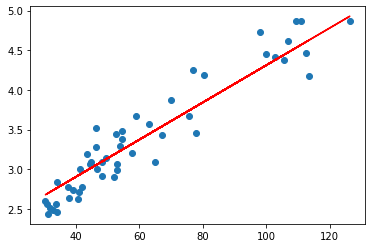

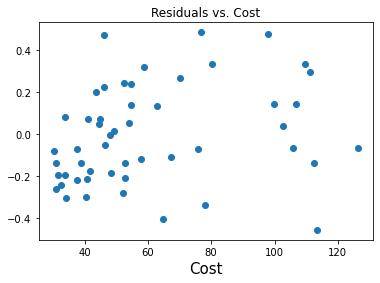

In [35]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

#Evaluate variance
#Diagnostics
test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor
plt.title('Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Non-constant variance reduced, but we also reduced our coefficient of determination